In [1]:
# 1 Preparaci[on del entorno de trabajo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


#cargar el dataset
titanic_data = pd.read_csv('titanic_dataset.csv')





In [11]:
titanic_dataset = pd.read_csv('titanic_dataset.csv')

In [12]:
titanic_dataset.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [18]:
#seleccionar las columnas relevantes para el clustering
titanic_data = titanic_dataset[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]

#reemplazar los valores NaN en la columna 'Age' con la media de la columna
titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace=True)

C:\Users\benit\AppData\Local\Temp\ipykernel_18720\552767518.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace=True)
C:\Users\benit\AppData\Local\Temp\ipykernel_18720\552767518.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_data['Age'].fillna(titanic_data['Age'].mean(

In [19]:
# estadarizar las carateristicas
scaler = StandardScaler()   
features_scaled = scaler.fit_transform(titanic_data)

#2. Visualizacion de los datos 

In [25]:
# matriz de dispersión
sns.pairplot
sns.pairplot(pd.DataFrame(features_scaled, columns=feature.columns) 
plt.suptitle('Matriz de Dispersión de las Características del Titanic', y=1.02)
plt.xlabel('Características')           

plt.title('Matriz de Dispersión de las Características del Titanic')
plt.show()      

SyntaxError: '(' was never closed (3910030823.py, line 3)

<Axes: >

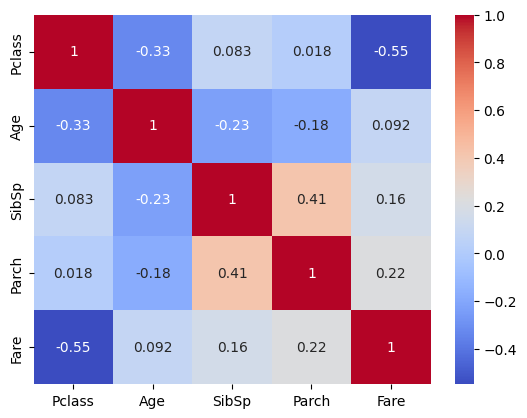

In [26]:
#corelación entre las características
correlation_matrix = pd.DataFrame(features_scaled, columns=titanic_data.columns).corr() 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')


### Determinación del número de clusters 

Mètodo del codo

# determinar el numero optimo de clus

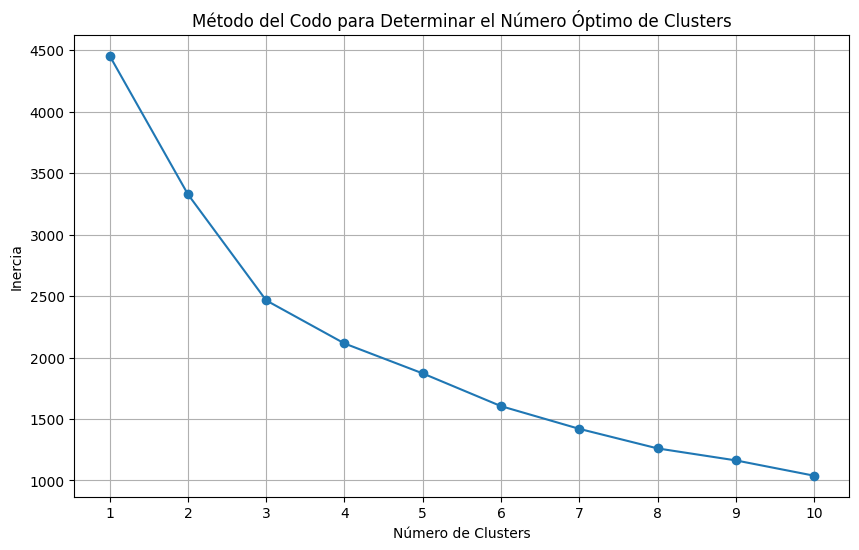

In [28]:
# deterrminar el numero optimo de cluster usando el mètodo del codo
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_) 
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o') 
plt.title('Método del Codo para Determinar el Número Óptimo de Clusters')
plt.xlabel('Número de Clusters')    
plt.ylabel('Inercia')
plt.xticks(range(1, 11))
plt.grid(True)


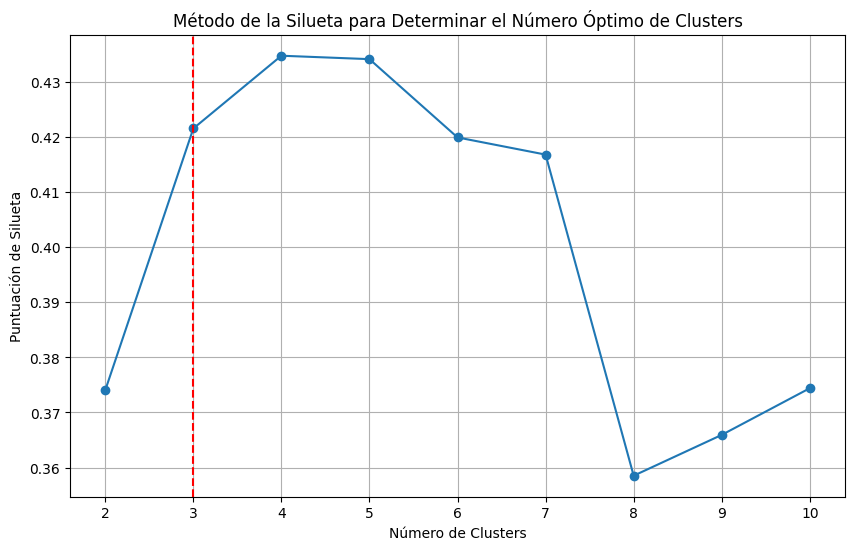

In [32]:
#Metodo de la silueta
from sklearn.metrics import silhouette_score    
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    score = silhouette_score(features_scaled, kmeans.labels_)
    silhouette_scores.append(score)
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Método de la Silueta para Determinar el Número Óptimo de Clusters')
plt.xlabel('Número de Clusters')
plt.ylabel('Puntuación de Silueta') 
plt.axvline(x=3 , color='red', linestyle='--', label='Número óptimo de clusters')
plt.xticks(range(2, 11))
plt.grid(True)
plt.show()



#Implementar el K-mean con K=3

C:\Users\benit\AppData\Local\Temp\ipykernel_18720\264816510.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_data['Cluster'] = kmeans.labels_


Text(0.5, 1.0, 'Clusters de Pasajeros del Titanic')

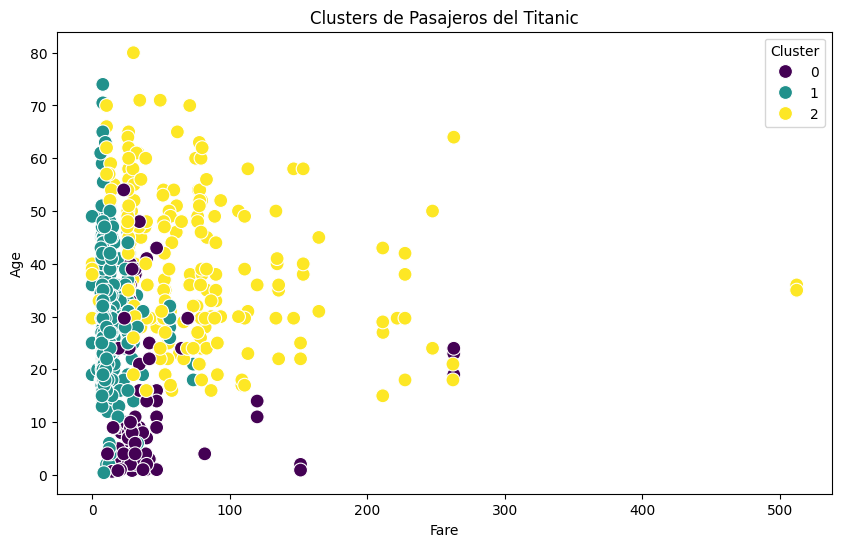

In [33]:
# aplicar Kmean con el número óptimo de clusters    
k_optimal = 3
kmeans = KMeans(n_clusters=k_optimal, random_state=42)      
kmeans.fit(features_scaled)

# agregar las etiquetas de cluster al DataFrame original
titanic_data['Cluster'] = kmeans.labels_

# visualizar los clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Fare', y='Age', hue='Cluster', data=titanic_data, palette='viridis', s=100)
plt.title('Clusters de Pasajeros del Titanic')

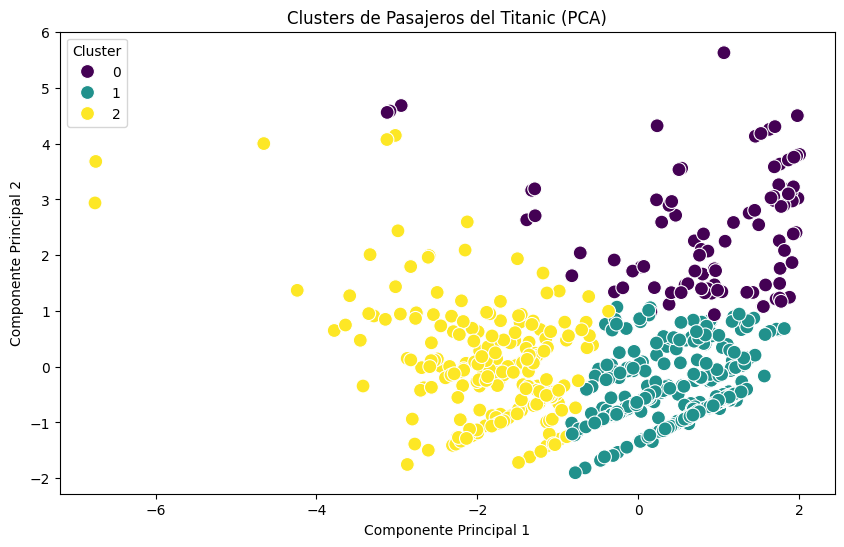

In [34]:
#reducción de dimensiones para una mejor visualización
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_scaled)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=features_pca[:, 0], y=features_pca[:,
    1], hue=titanic_data['Cluster'], palette='viridis', s=100)
plt.title('Clusters de Pasajeros del Titanic (PCA)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Cluster')
plt.show()